<a href="https://colab.research.google.com/github/RitulMohan/TF.Autoencoder/blob/main/Keras_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
intro = pd.read_csv('/content/drive/MyDrive/Data_tf2_keras/lending_club_info.csv')

In [6]:
intro.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [7]:
df= pd.read_csv('/content/drive/MyDrive/Data_tf2_keras/lending_club_loan_two.csv')

In [8]:
df .head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# **Exploratory data analysis**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


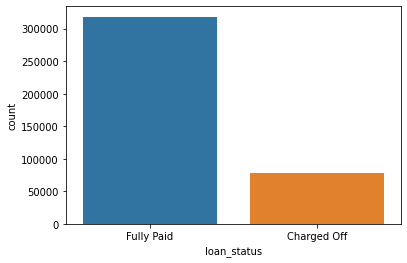

In [11]:
sns.countplot(df['loan_status'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


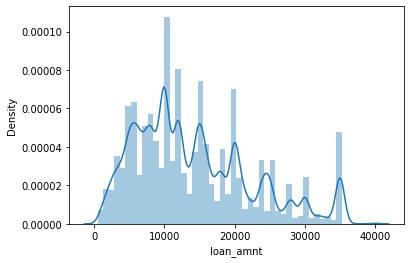

In [12]:
sns.distplot(df['loan_amnt'])

In [13]:
df.corr().transpose()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


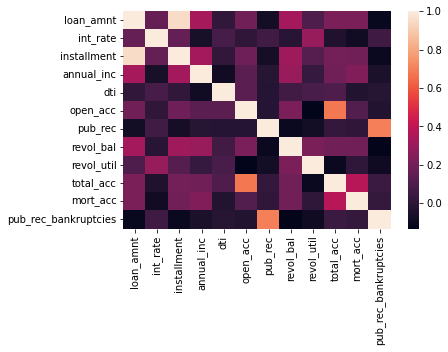

In [14]:
sns.heatmap(df.corr())

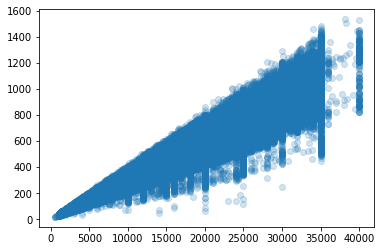

In [15]:
plt.scatter(df['loan_amnt'],df['installment'], alpha =0.2)

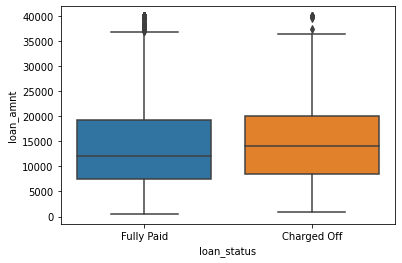

In [16]:
sns.boxplot(x='loan_status', y='loan_amnt', data =df)

In [17]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [18]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


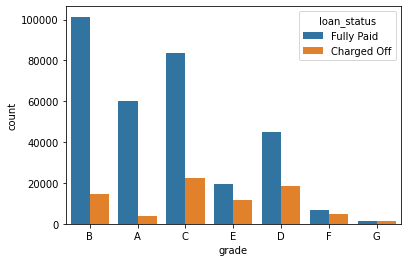

In [19]:
sns.countplot(df['grade'], hue = df['loan_status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x432 with 0 Axes>

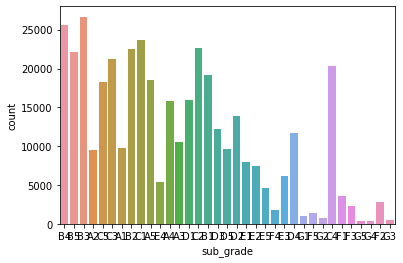

<Figure size 720x432 with 0 Axes>

In [20]:
sns.countplot('sub_grade', data =df)
plt.figure(figsize =(10,6))

it would give us a better idea if we sort the sub grades

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


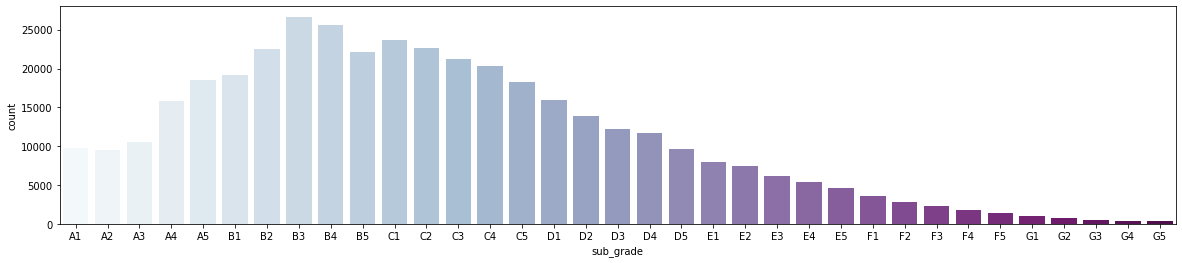

In [21]:
subgrade_order = sorted(df['sub_grade'].unique())

plt.figure(figsize =(20,4))
sns.countplot('sub_grade', data =df, order = subgrade_order, palette = 'BuPu')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


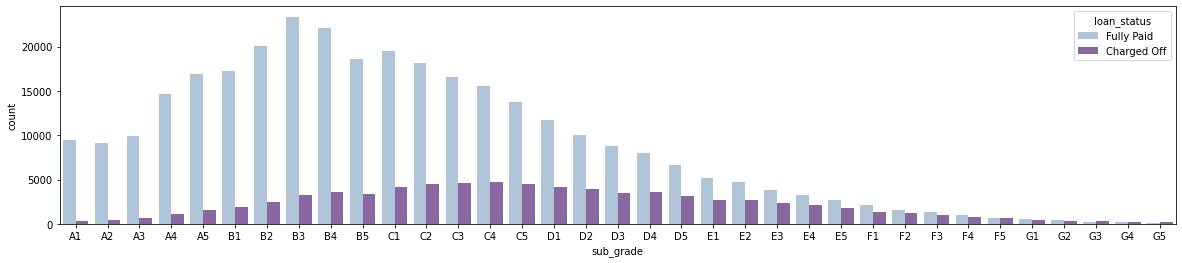

In [22]:
subgrade_order = sorted(df['sub_grade'].unique())

plt.figure(figsize =(20,4))
sns.countplot('sub_grade', data =df, order = subgrade_order, palette = 'BuPu', hue='loan_status')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


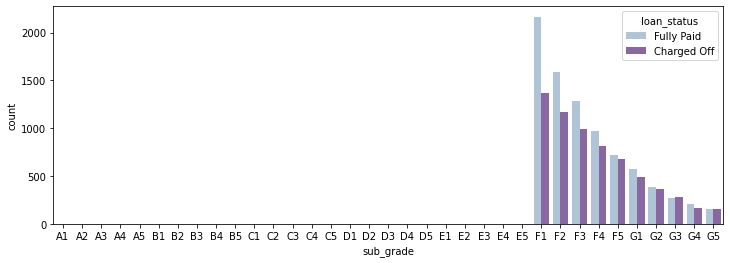

In [23]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

subgrade_order = sorted(df['sub_grade'].unique())

plt.figure(figsize =(12,4))
sns.countplot('sub_grade', data =f_and_g, order = subgrade_order, palette = 'BuPu', hue='loan_status')

###currently we've been given loan status as a string, we need to change it to a binary value 

In [24]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [25]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


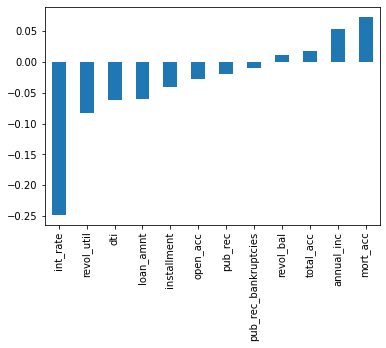

In [26]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

## **Data Pre-Processing**

In [27]:
len(df)

396030

In [28]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [29]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [31]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [32]:
emp_oreder = df['emp_length'].unique()[::-1]

In [33]:
df = df.drop('emp_title', axis =1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


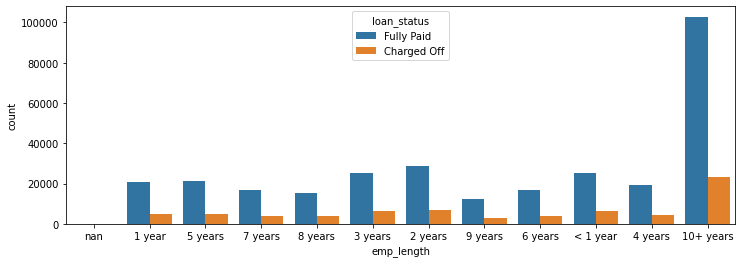

In [36]:
emp_order = df['emp_length'].unique()[::-1]
plt.figure(figsize=(12,4))
sns.countplot('emp_length', data=df, order =emp_order, hue = 'loan_status')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


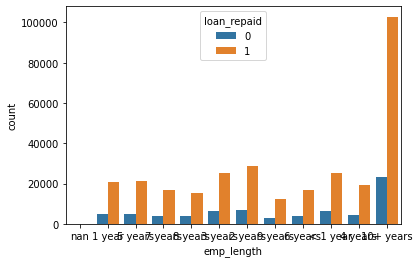

In [35]:
sns.countplot('emp_length', data =df, hue ='loan_repaid', order =emp_oreder)

In [37]:
df = df.drop('emp_length', axis =1)

In [38]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

*mort_acc : the number of mortgage accounts*



In [42]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [45]:
df.corr()['mort_acc'].sort_values(ascending = False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [49]:
#group the total_acc and calculate the an values for the mort_acc per total_acc entry 


df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [54]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [55]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [56]:
total_acc_avg[2.0]

0.0

In [57]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [58]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

removing these 276 and 535 people who do not have any data will not be much of a harm to the model 

**df.dropna** removes all the data points which have Nan info related to them

In [59]:
df = df.dropna()

In [61]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### we are done with numeric data, now we need to take care of data stored as categorical data given in the from strings, we will be dealing with **dummy variables** 

In [62]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
loan_repaid               int64
dtype: object

In [63]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [70]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [71]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


Grade is a part of sub_grade so it'll be a redundant feature

In [ ]:
df = df.drop('grade', axis =1)

In [66]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [73]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df.select_dtypes('object')

,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...
396025,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [75]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [76]:
df.select_dtypes('object')

,home_ownership,issue_d,loan_status,earliest_cr_line,address
0,RENT,Jan-2015,Fully Paid,Jun-1990,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,MORTGAGE,Jan-2015,Fully Paid,Jul-2004,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,RENT,Jan-2015,Fully Paid,Aug-2007,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,RENT,Nov-2014,Fully Paid,Sep-2006,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,MORTGAGE,Apr-2013,Charged Off,Mar-1999,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...
396025,RENT,Oct-2015,Fully Paid,Nov-2004,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,MORTGAGE,Feb-2015,Fully Paid,Feb-2006,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,RENT,Oct-2013,Fully Paid,Mar-1997,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,MORTGAGE,Aug-2012,Fully Paid,Nov-1990,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [79]:
df = df.drop('loan_status', axis =1)
df.select_dtypes('object')

,home_ownership,issue_d,earliest_cr_line,address
0,RENT,Jan-2015,Jun-1990,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,MORTGAGE,Jan-2015,Jul-2004,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,RENT,Jan-2015,Aug-2007,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,RENT,Nov-2014,Sep-2006,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,MORTGAGE,Apr-2013,Mar-1999,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...
396025,RENT,Oct-2015,Nov-2004,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,MORTGAGE,Feb-2015,Feb-2006,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,RENT,Oct-2013,Mar-1997,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,MORTGAGE,Aug-2012,Nov-1990,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [80]:
df.value_counts('home_ownership')

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
dtype: int64

In [81]:
# replacing ANY and NONE classes with OTHER as they have very few instances
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

#getdummies
dummy = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [82]:
df.select_dtypes('object')

,issue_d,earliest_cr_line,address
0,Jan-2015,Jun-1990,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,Jan-2015,Jul-2004,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,Jan-2015,Aug-2007,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,Nov-2014,Sep-2006,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,Apr-2013,Mar-1999,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...
396025,Oct-2015,Nov-2004,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,Feb-2015,Feb-2006,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,Oct-2013,Mar-1997,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,Aug-2012,Nov-1990,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


## Lets try to separate out **zipcode** from the address

In [86]:
df['zipcode'] = df['address'].apply(lambda address: address[-5:])

In [89]:
df.drop('address', axis =1)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zipcode
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,26.24,Jun-1990,16.0,0.0,...,0,0,0,0,0,0,0,1,0,22690
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,22.05,Jul-2004,17.0,0.0,...,0,0,0,0,0,0,0,0,0,05113
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,12.79,Aug-2007,13.0,0.0,...,0,0,0,0,0,0,0,0,0,05113
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,00813
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,33.95,Mar-1999,13.0,0.0,...,0,0,0,0,0,0,0,0,0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,15.63,Nov-2004,6.0,0.0,...,0,0,0,0,0,0,0,0,0,30723
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,21.45,Feb-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,05113
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,17.56,Mar-1997,15.0,0.0,...,0,0,0,0,0,0,0,0,0,70466
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,15.88,Nov-1990,9.0,0.0,...,0,0,0,0,0,0,0,0,0,29597


In [90]:
df.select_dtypes('object')

,issue_d,earliest_cr_line,address,zipcode
0,Jan-2015,Jun-1990,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",22690
1,Jan-2015,Jul-2004,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",05113
2,Jan-2015,Aug-2007,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",05113
3,Nov-2014,Sep-2006,"823 Reid Ford\r\nDelacruzside, MA 00813",00813
4,Apr-2013,Mar-1999,"679 Luna Roads\r\nGreggshire, VA 11650",11650
...,...,...,...,...
396025,Oct-2015,Nov-2004,"12951 Williams Crossing\r\nJohnnyville, DC 30723",30723
396026,Feb-2015,Feb-2006,"0114 Fowler Field Suite 028\r\nRachelborough, ...",05113
396027,Oct-2013,Mar-1997,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",70466
396028,Aug-2012,Nov-1990,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",29597


In [92]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)
df = df.drop(['zipcode'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [93]:
df = df.drop('issue_d',axis=1)

### **earliest_cr_line** seems to be a historical time stamp feature, we will extract the year from it 

In [94]:
#%%
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [95]:
df.select_dtypes('object')

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...
396025,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [96]:
df = df.drop('address', axis =1)

### train - test - split


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [103]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# creating the model 

In [105]:
import tensorflow as tf 

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [106]:
model = Sequential([
     Dense(78, activation ='relu'), 
     Dropout(0.2),

     Dense(39, activation ='relu'), 
     Dropout(0.2), 

     Dense(19, activation ='relu'), 
     Dropout(0.2),

     Dense(1, activation = 'sigmoid'), 

])

model.compile(loss ='binary_crossentropy', optimizer='adam')

In [107]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 8s 5ms/step - loss: 0.2997 - val_loss: 0.2681
Epoch 2/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2657 - val_loss: 0.2638
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2633 - val_loss: 0.2635
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2621 - val_loss: 0.2626
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2615 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2610 - val_loss: 0.2623
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2604 - val_loss: 0.2622
Epoch 8/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2603 - val_loss: 0.2619
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2600 - val_loss: 0.2619
Epoch 10/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.259

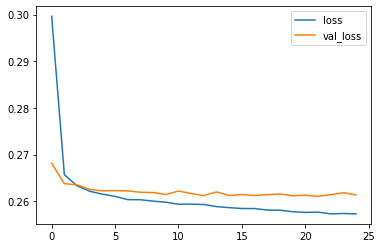

In [109]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
preditions = model.predict(X_test)

In [122]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 93, dtype: float64

In [125]:
model.predict(new_customer.values.reshape(1,93))

array([[1.]], dtype=float32)